In [107]:
import requests
import pandas as pd

#### 1. Data Collection

  a. Through API (don't run this)

In [ ]:
limit = 10000

# Define the dataset ID and initial API endpoint
dataset_id = "d_8b84c4ee58e3cfc0ece0d773c8ca6abc"  # Replace with the actual dataset ID
base_url = f"https://data.gov.sg/api/action/datastore_search?resource_id={dataset_id}&limit={limit}"
offset = 0

all_records = []

for _ in range(80):
    # Fetch the data from the API with the current offset
    api_endpoint = f"{base_url}&offset={offset}"
    response = requests.get(api_endpoint)
    data = response.json()


    if data['success']:
    # Check if records were returned
        records = data['result']['records']
    else:
        break
    
    # Append the fetched records to the list
    all_records.extend(records)
    
    # Update the offset for the next iteration
    offset += limit

# Convert records to a DataFrame
df = pd.DataFrame(all_records)


print("All records have been downloaded and saved to dataset.csv")


In [ ]:
df.head().T

In [ ]:
df.shape

b. Through already downloaded files  

In [225]:
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [306]:
# df = pd.DataFrame()
# df = pd.concat([df, df1], axis=0)
# df = pd.concat([df, df2], axis=0)
# df = pd.concat([df, df3], axis=0)
# df = pd.concat([df, df4], axis=0)
# df = pd.concat([df, df5], axis=0)
df = df4

In [307]:
df.head().T

,0,1,2,3,4
month,2015-01,2015-01,2015-01,2015-01,2015-01
town,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO
flat_type,3 ROOM,3 ROOM,3 ROOM,3 ROOM,3 ROOM
block,174,541,163,446,557
street_name,ANG MO KIO AVE 4,ANG MO KIO AVE 10,ANG MO KIO AVE 4,ANG MO KIO AVE 10,ANG MO KIO AVE 10
storey_range,7,1,1,1,7
floor_area_sqm,60.0,68.0,69.0,68.0,68.0
flat_model,Improved,New Generation,New Generation,New Generation,New Generation
lease_commence_date,1986,1981,1980,1979,1980
remaining_lease,70,65,64,63,64


In [308]:
df.shape

(37153, 13)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  int32  
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
 11  month_1              37153 non-null  int32  
 12  year_1               37153 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 3.3+ MB


In [310]:
df['month'].count()

37153

In [311]:
df['block'].unique()

array(['174', '541', '163', ..., '434A', '223B', '81B'], dtype=object)

In [312]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [313]:
def year_month_correction(dfs):
    dfs['month_1'] = pd.to_datetime(dfs['month']).dt.month
    dfs['year_1'] = pd.to_datetime(dfs['month']).dt.year

In [314]:
df['month_1'] = pd.to_datetime(df['month']).dt.month
df['year_1'] = pd.to_datetime(df['month']).dt.year

In [315]:
df.select_dtypes(include=['float', 'int', 'bool']).describe()

,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,month_1,year_1
count,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000
mean,7.168842,96.974468,1990.920195,73.913116,432550.914244,6.635480,2015.521438
std,5.346278,24.037430,10.862330,10.885456,123536.717658,3.307996,0.499547
min,1.000000,31.000000,1966.000000,48.000000,190000.000000,1.000000,2015.000000
25%,4.000000,74.000000,1984.000000,66.000000,340000.000000,4.000000,2015.000000
50%,7.000000,96.000000,1989.000000,72.000000,408000.000000,7.000000,2016.000000
75%,10.000000,111.000000,2000.000000,83.000000,495000.000000,9.000000,2016.000000
max,49.000000,166.500000,2013.000000,97.000000,727500.000000,12.000000,2016.000000


In [316]:
df['lease_commence_date']

0        1986
1        1981
2        1980
3        1979
4        1980
         ... 
37148    2000
37149    1987
37150    1992
37151    1988
37152    1987
Name: lease_commence_date, Length: 37153, dtype: int64

In [317]:
df.fillna({'remaining_lease': 0}, inplace=True)

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='lease_commence_date', ylabel='Count'>

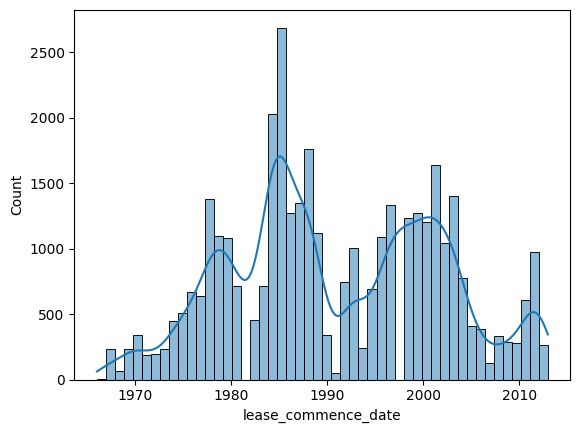

In [319]:
sns.histplot(x='lease_commence_date', data=df, kde=True)

<Axes: xlabel='year_1', ylabel='Count'>

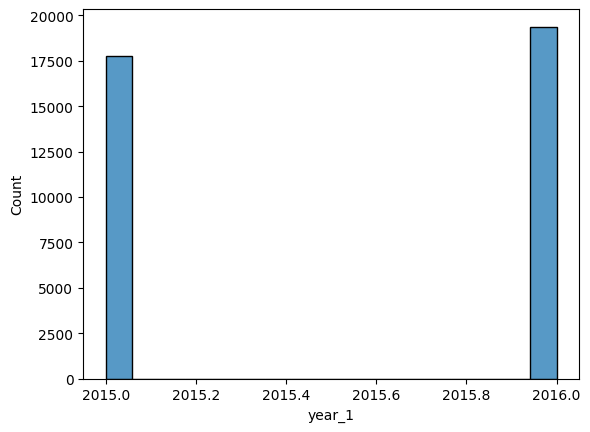

In [320]:
sns.histplot(x='year_1', data=df)

In [321]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
month_1                0
year_1                 0
dtype: int64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  int32  
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
 11  month_1              37153 non-null  int32  
 12  year_1               37153 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 3.3+ MB


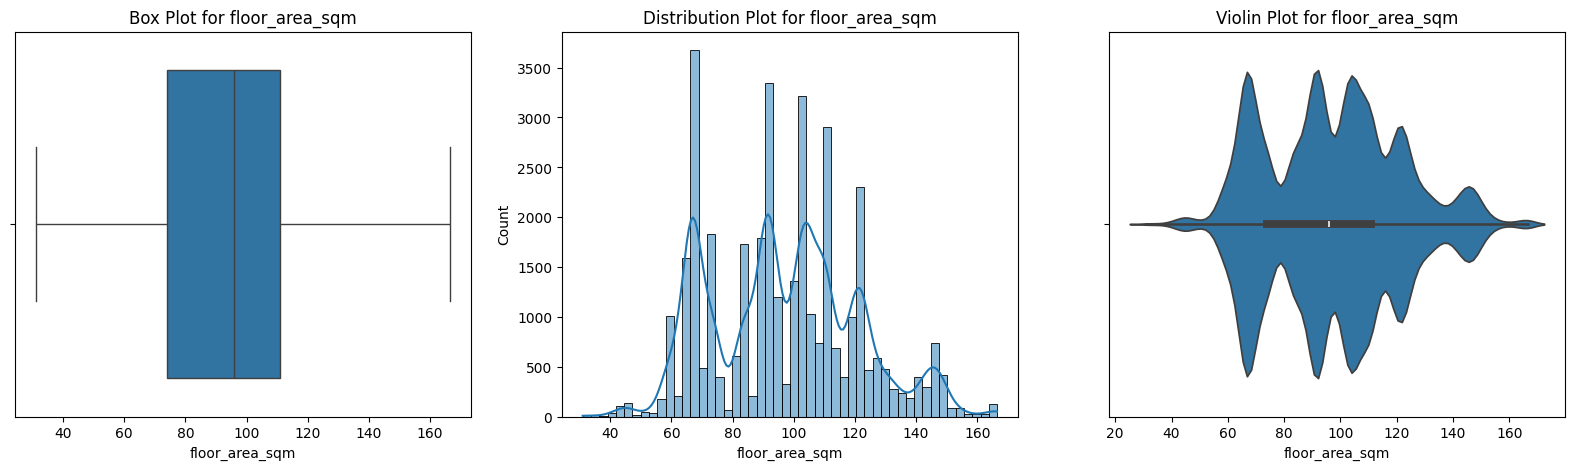

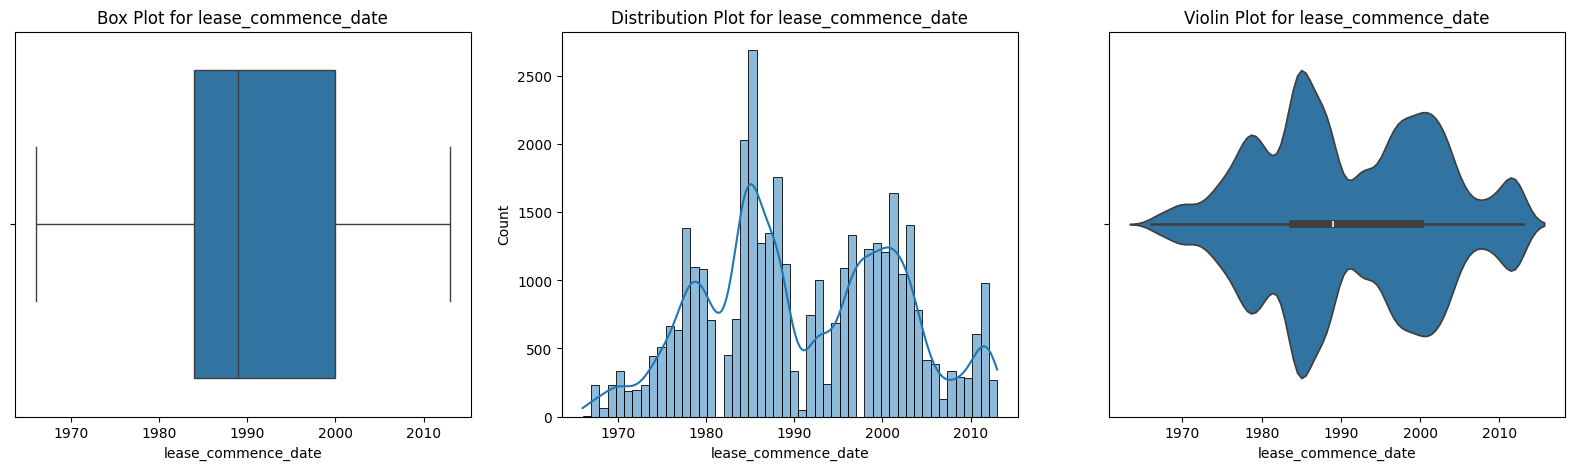

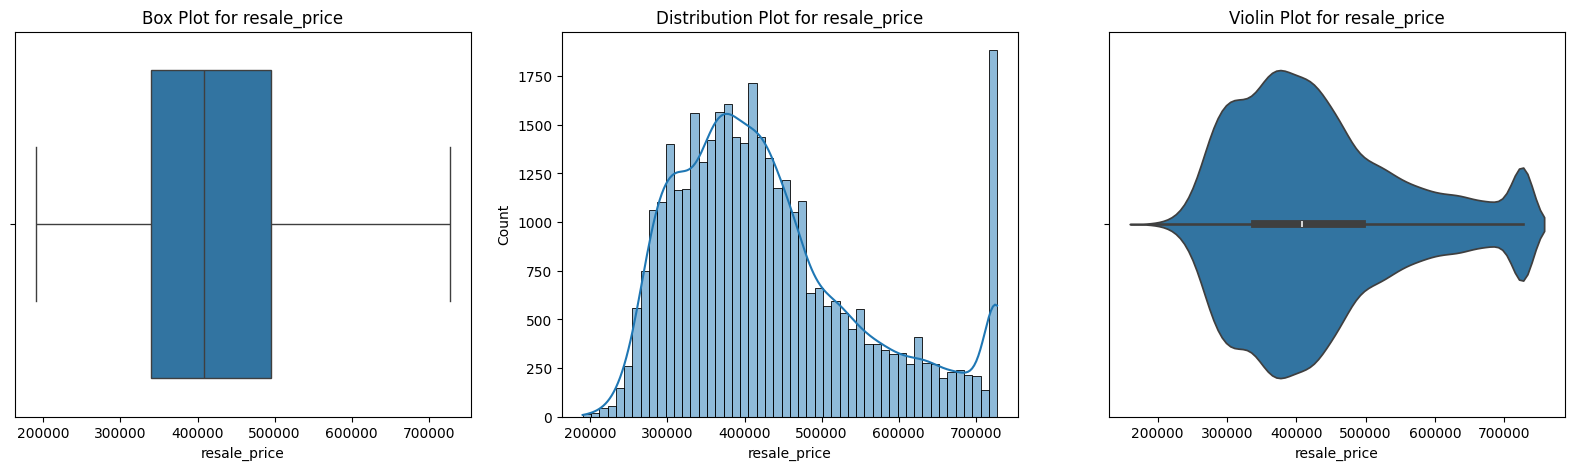

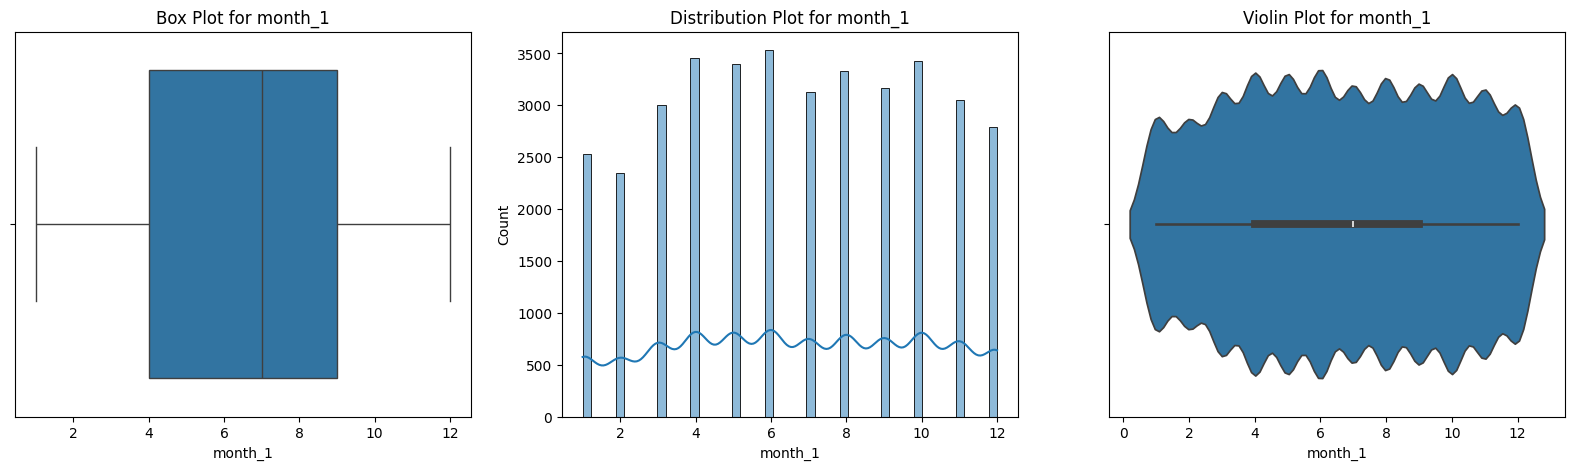

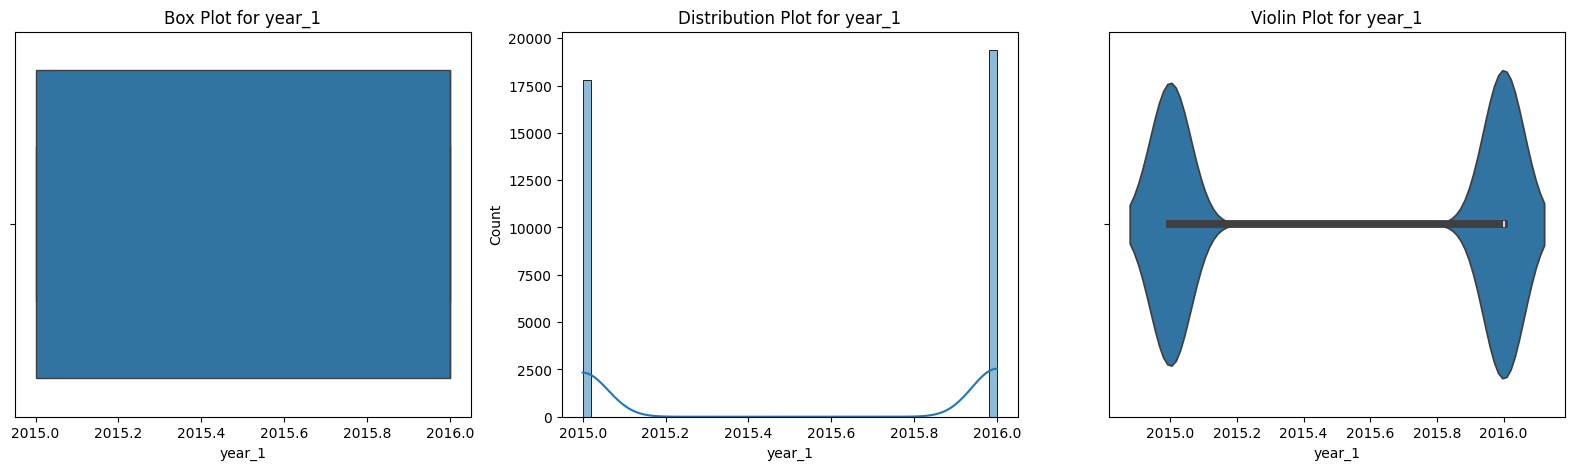

In [323]:
def plot(df, column):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    sns.boxplot(data=df, x=column, ax=axes[0]).set_title(f'Box Plot for {column}')
    sns.histplot(data=df, x=column, kde=True, bins=50, ax=axes[1]).set_title(f'Distribution Plot for {column}')
    sns.violinplot(data=df, x=column, ax=axes[2]).set_title(f'Violin Plot for {column}')
    plt.show()
     

for i in ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'month_1', 'year_1']:
    plot(df, i)
     


In [324]:
def remove_outliers_idr(data, column, threshold=1.5):

    # Calculate the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    data[column] = data[column].clip(lower_bound, upper_bound)
    

In [325]:
remove_outliers_idr(df, 'floor_area_sqm')

In [326]:
remove_outliers_idr(df, 'resale_price')

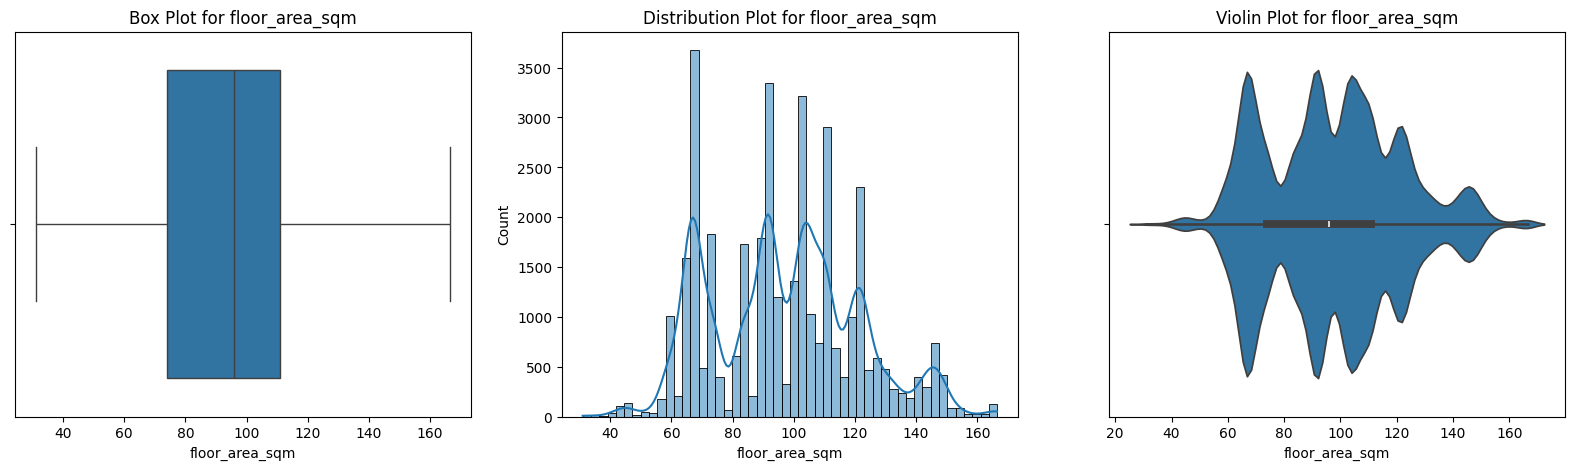

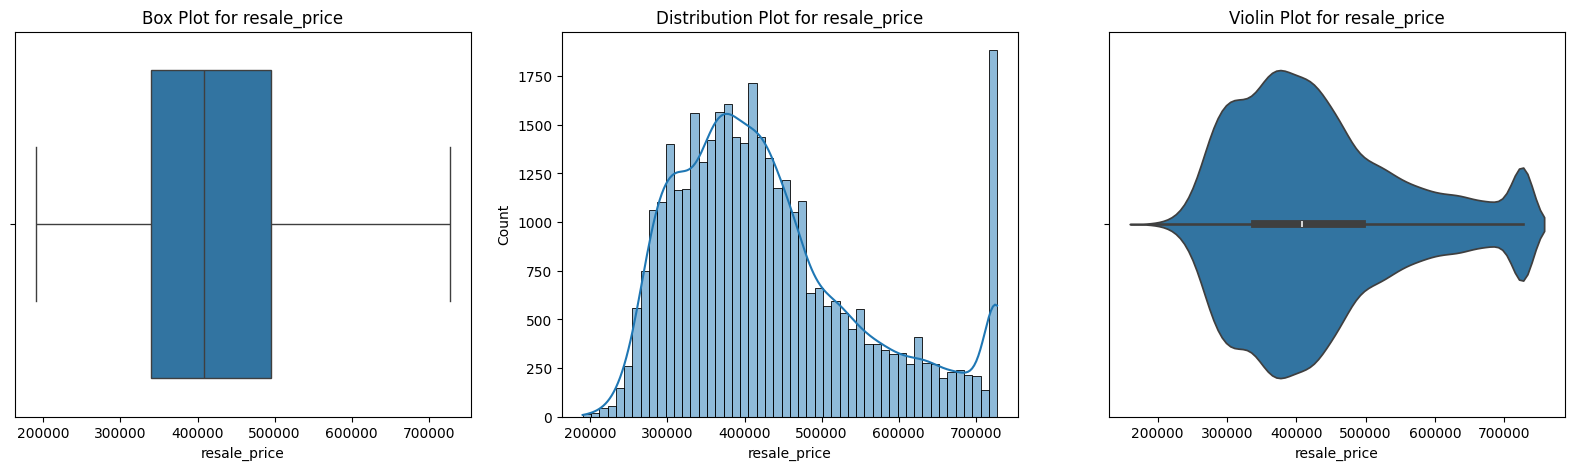

In [327]:
for i in ['floor_area_sqm', 'resale_price']:
    plot(df, i)
     

In [328]:
df[df['floor_area_sqm'] > 181]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,month_1,year_1


In [329]:
df.head().T

,0,1,2,3,4
month,2015-01,2015-01,2015-01,2015-01,2015-01
town,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO
flat_type,3 ROOM,3 ROOM,3 ROOM,3 ROOM,3 ROOM
block,174,541,163,446,557
street_name,ANG MO KIO AVE 4,ANG MO KIO AVE 10,ANG MO KIO AVE 4,ANG MO KIO AVE 10,ANG MO KIO AVE 10
storey_range,7,1,1,1,7
floor_area_sqm,60.0,68.0,69.0,68.0,68.0
flat_model,Improved,New Generation,New Generation,New Generation,New Generation
lease_commence_date,1986,1981,1980,1979,1980
remaining_lease,70,65,64,63,64


In [330]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [331]:
df1 = df.copy()

In [332]:
from sklearn.preprocessing import OrdinalEncoder

In [333]:
encoder = OrdinalEncoder()

In [334]:
df1['town'] = encoder.fit_transform(df1[['town']])

In [335]:
df1['street_name'].nunique()

519

In [336]:
df1['street_name'].unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3',
       'ANG MO KIO AVE 6', 'ANG MO KIO ST 52', 'ANG MO KIO ST 21',
       'ANG MO KIO ST 31', 'BEDOK RESERVOIR RD', 'BEDOK STH RD',
       'BEDOK NTH ST 3', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'NEW UPP CHANGI RD', 'CHAI CHEE ST', 'BEDOK NTH ST 1',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 2', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 3', 'BEDOK STH AVE 1', 'BEDOK CTRL',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'BEDOK RESERVOIR VIEW',
       'CHAI CHEE RD', 'JLN TENAGA', 'BEDOK STH AVE 3', 'LENGKONG TIGA',
       'SHUNFU RD', 'BISHAN ST 24', 'BISHAN ST 12', 'BISHAN ST 22',
       'BISHAN ST 13', 'BISHAN ST 23', 'BRIGHT HILL DR', 'SIN MING AVE',
       'BT BATOK ST 52', 'BT BATOK WEST AVE 4', 'BT BATOK WEST AVE 2',
       'BT BATOK EAST AVE 4', 'BT BATOK EAST AVE 3', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 8', 'BT BATOK ST 

In [337]:
df1['street_name'] = encoder.fit_transform(df1[['street_name']])

In [338]:
df1['block'].nunique()

2108

In [339]:
df1['block'].unique()

array(['174', '541', '163', ..., '434A', '223B', '81B'], dtype=object)

In [340]:
df1['block'] = encoder.fit_transform(df1[['block']])

In [341]:
df1['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room'],
      dtype=object)

In [342]:
df1['flat_model'] = encoder.fit_transform(df1[['flat_model']])

In [343]:
df1['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [344]:
df1['flat_type'] = encoder.fit_transform(df1[['flat_type']])

In [345]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  float64
 2   flat_type            37153 non-null  float64
 3   block                37153 non-null  float64
 4   street_name          37153 non-null  float64
 5   storey_range         37153 non-null  int32  
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  float64
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
 11  month_1              37153 non-null  int32  
 12  year_1               37153 non-null  int32  
dtypes: float64(7), int32(3), int64(2), object(1)
memory usage: 3.3+ MB


In [350]:
df1['storey_range'].unique()

array([ 7,  1, 13, 10,  4, 19, 16, 22, 25, 28, 34, 46, 31, 37, 43, 40, 49])

In [351]:
df1[['block', 'street_name', 'flat_model']] = encoder.fit_transform(df[['block', 'street_name', 'flat_model']])

In [349]:
df['storey_range'] = df['storey_range'].astype(str)

# Extract the first two characters and handle non-numeric values safely
df['storey_range_first_two'] = df['storey_range'].str[:2]

# Remove any non-numeric values
df['storey_range_first_two'] = pd.to_numeric(df['storey_range_first_two'], errors='coerce')
    
    # {'10 TO 12': 11, '04 TO 06': 5, '07 TO 09': 8, '01 TO 03': 2, '13 TO 15': 14, 
    #                      '19 TO 21': 20, '16 TO 18': 17, '25 to 27': 26, '22 to 24': 23}

In [352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  float64
 2   flat_type            37153 non-null  float64
 3   block                37153 non-null  float64
 4   street_name          37153 non-null  float64
 5   storey_range         37153 non-null  int32  
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  float64
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
 11  month_1              37153 non-null  int32  
 12  year_1               37153 non-null  int32  
dtypes: float64(7), int32(3), int64(2), object(1)
memory usage: 3.3+ MB


In [353]:
df2 = df1.drop(columns = ['month'])

In [354]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   town                 37153 non-null  float64
 1   flat_type            37153 non-null  float64
 2   block                37153 non-null  float64
 3   street_name          37153 non-null  float64
 4   storey_range         37153 non-null  int32  
 5   floor_area_sqm       37153 non-null  float64
 6   flat_model           37153 non-null  float64
 7   lease_commence_date  37153 non-null  int64  
 8   remaining_lease      37153 non-null  int64  
 9   resale_price         37153 non-null  float64
 10  month_1              37153 non-null  int32  
 11  year_1               37153 non-null  int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 3.0 MB


In [355]:
df2.describe()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,month_1,year_1
count,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000,37153.000000
mean,13.372137,3.098808,902.388878,248.081393,7.168842,96.974468,7.926466,1990.920195,73.913116,432550.914244,6.635480,2015.521438
std,8.067356,0.918108,584.330080,158.121276,5.346278,24.037430,3.776646,10.862330,10.885456,123536.717658,3.307996,0.499547
min,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000,0.000000,1966.000000,48.000000,190000.000000,1.000000,2015.000000
25%,6.000000,2.000000,380.000000,109.000000,4.000000,74.000000,4.000000,1984.000000,66.000000,340000.000000,4.000000,2015.000000
50%,13.000000,3.000000,914.000000,244.000000,7.000000,96.000000,7.000000,1989.000000,72.000000,408000.000000,7.000000,2016.000000
75%,21.000000,4.000000,1354.000000,387.000000,10.000000,111.000000,11.000000,2000.000000,83.000000,495000.000000,9.000000,2016.000000
max,25.000000,6.000000,2107.000000,518.000000,49.000000,166.500000,19.000000,2013.000000,97.000000,727500.000000,12.000000,2016.000000


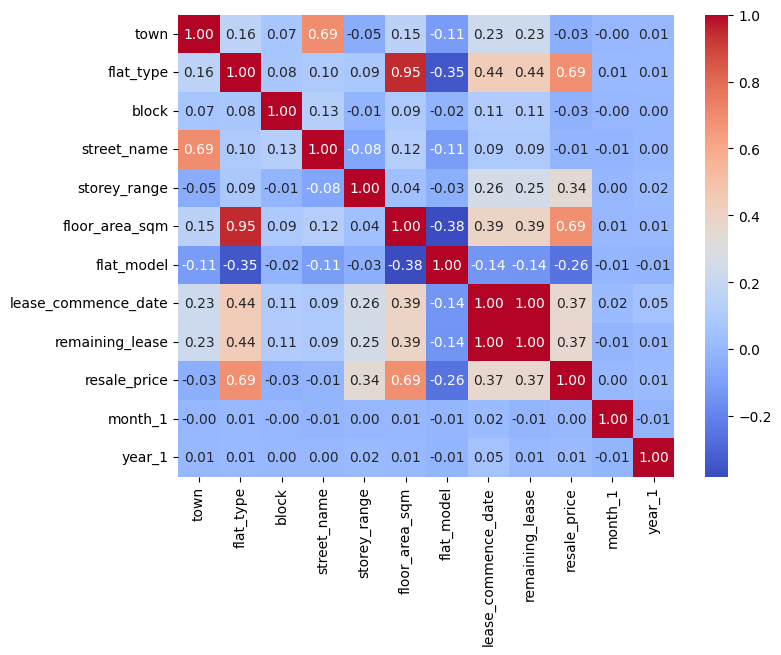

In [356]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [370]:
df3 = df2.drop(columns=['town', 'flat_type'])
df3 = df2.drop(columns=['flat_type'])

In [371]:
df3.reset_index(drop=True)

,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,month_1,year_1
0,0.0,218.0,13.0,7,60.0,4.0,1986,70,255000.0,1,2015
1,0.0,1259.0,10.0,1,68.0,11.0,1981,65,275000.0,1,2015
2,0.0,182.0,13.0,1,69.0,11.0,1980,64,285000.0,1,2015
3,0.0,1031.0,10.0,1,68.0,11.0,1979,63,290000.0,1,2015
4,0.0,1276.0,10.0,7,68.0,11.0,1980,64,290000.0,1,2015
...,...,...,...,...,...,...,...,...,...,...,...
37148,25.0,657.0,505.0,13,112.0,4.0,2000,82,488000.0,12,2016
37149,25.0,1850.0,512.0,1,122.0,4.0,1987,69,455000.0,12,2016
37150,25.0,1516.0,496.0,10,166.5,2.0,1992,74,727500.0,12,2016
37151,25.0,790.0,501.0,1,146.0,6.0,1988,70,575000.0,12,2016


In [376]:
X = df3.drop(columns=['resale_price'])
y = df3[['resale_price']]

In [377]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [378]:
# Define the function to evaluate the regression model
def machine_learning_regression(X, y, algorithm_list):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for algo_name, algo_model in algorithm_list.items():
        model = algo_model.fit(X_train, y_train)
        
        r2_train = r2_score(y_train, model.predict(X_train))
        r2_test = r2_score(y_test, model.predict(x_test))
        
        print( {
            'algorithm': algo_name,
            'R2_train': r2_train,
            'R2_test': r2_test
        })

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
param_grid_r = {'max_depth'        : [2, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf' : [1, 2, 4],
                'max_features'     : ['sqrt', 'log2', None]}

# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(10, 200, 10),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(2, 20, 2)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

grid_search_r = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid, cv=5, n_jobs=-1)
grid_search_r.fit(X_train, y_train)

C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      14, 16, 18],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [383]:
print(grid_search_r.best_params_)
print(grid_search_r.best_score_)

{'n_estimators': 160, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': False}
0.9371468153504205


In [390]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

C:\Users\vikki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [391]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9940523949193916, 0.960626827949144)

In [392]:
import pickle

In [393]:
with open('singapore_flat_2015_2016.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

In [394]:
with open('singapore_flat_2015_2016_OrdEnc.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [211]:
# Load the saved encoder
with open('singapore_flat_1990_1999.pkl', 'rb') as f:
    model = pickle.load(f)

In [212]:
# Load the saved encoder
with open('singapore_flat_1990_1999_OrdEnc.pkl', 'rb') as f:
    encoder = pickle.load(f)

In [91]:
# cat = df[['flat_model']]

In [ ]:
# # Reshape the array for the encoder
# # categories = cat.reshape(-1, 1)

# # Fit the OrdinalEncoder
# encoder = OrdinalEncoder()
# encoder.fit_transform(cat)

In [173]:
import numpy as np
# The specific category you want to encode
category_to_encode = pd.DataFrame({ 'block': ['216'], 
                                    'street_name': ['ANG MO KIO AVE 1'],   
                                    'flat_model': ['MAISONETTE'],
                                  })#np.array(['MAISONETTE']).reshape(-1, 1)

# Transform the category to its encoded integer
encoded_value = encoder.transform(category_to_encode)

print(encoded_value)


[[147.   4.   4.]]


In [221]:
encoder = OrdinalEncoder()

In [222]:
df1[['block', 'street_name', 'flat_model']] = encoder.fit_transform(df[['block', 'street_name', 'flat_model']])

In [167]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_1,year_1
0,1990-01,0.0,0.0,269.0,4.0,11.0,31.0,2.0,1977,9000,1,1990
1,1990-01,0.0,0.0,269.0,4.0,5.0,31.0,2.0,1977,6000,1,1990
2,1990-01,0.0,0.0,269.0,4.0,11.0,31.0,2.0,1977,8000,1,1990
3,1990-01,0.0,0.0,269.0,4.0,8.0,31.0,2.0,1977,6000,1,1990
4,1990-01,0.0,2.0,147.0,4.0,5.0,73.0,8.0,1976,47200,1,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,25.0,5.0,647.0,408.0,11.0,142.0,1.0,1987,456000,12,1999
287192,1999-12,25.0,5.0,287.0,402.0,2.0,142.0,1.0,1988,408000,12,1999
287193,1999-12,25.0,5.0,366.0,399.0,8.0,146.0,4.0,1988,469000,12,1999
287194,1999-12,25.0,5.0,326.0,404.0,5.0,146.0,4.0,1988,440000,12,1999


In [174]:
def transform_features(features, encoder):
    df = pd.DataFrame(columns=['block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 	
                               'month_1', 'year_1'])

    # Ensure the features list has enough elements
    if len(features) < 7:
        raise ValueError("Insufficient number of elements in the features list.")

    # Parse the date and extract month and year
    df['month_1'] = [pd.to_datetime(features[0]).month]
    df['year_1'] = [pd.to_datetime(features[0]).year]

    # Assign the storey range and map it to the corresponding value
    df['storey_range'] = features[3]
    df['storey_range'] = df['storey_range'].map({
        '10 TO 12': 11, '04 TO 06': 5, '07 TO 09': 8, '01 TO 03': 2, '13 TO 15': 14,
        '19 TO 21': 20, '16 TO 18': 17, '25 TO 27': 26, '22 TO 24': 23
    })

    # Assign floor area and lease commence date
    df['floor_area_sqm'] = features[4]
    df['lease_commence_date'] = features[6]

    # Create a DataFrame for the categorical features
    category_to_encode = pd.DataFrame({
        'block': [features[1]],
        'street_name': [features[2]],
        'flat_model': [features[5]]
    })

    # Encode the categorical features
    encoded_categories = encoder.transform(category_to_encode)
    df[['block', 'street_name', 'flat_model']] = encoded_categories

    return df

    

In [216]:

features = ['1998-07', '216', 'ANG MO KIO AVE 1', '13 TO 15', 100.0, 'STANDARD', 1997]
yt = transform_features(features, encoder)

In [217]:
yt

,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,month_1,year_1
0,147.0,4.0,14,100.0,11.0,1997,7,1998


In [218]:
model.predict(yt)

array([257660.71556534])